generation : 21
population : 52
best score : 0


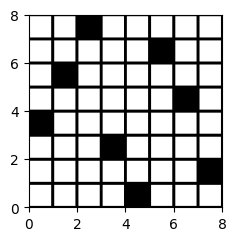

[3 5 7 2 0 6 4 1]


In [31]:
import numpy as np

_chromosomeLength = 8
_populatationCount = 54
_mutationProbability = 0.3
_populationSelectionRatio = 0.5
_crossoverMask = np.array([])
_invCrossoverMask = np.array([])

_randomCrossoverMask = 1
#_crossoverMask, _invCrossoverMask = GenerateCrossoverMask([0,0,0,0,1,1,1,1])
    
s=Solve()

Display(s)
print(s)

In [11]:
from IPython.display import clear_output

def Solve():
    
    population, scores = GeneratePopulation()
    population, scores = SortPopulationByScore(population, scores)

    generation = 1
    while (scores[0]!= 0):
        generation += 1
        population, scores = Evolve(population, scores)
        clear_output(wait=True)
        print(f'generation : {generation}')
        print(f'population : {len(population)}')
        print(f'best score : {scores[0]}')
    
    return population[0]

In [10]:
def Evolve(population , scores):
        
    population, scores = Select(population , scores)
    
    population, scores = Crossover(population , scores)
    
    population, scores = Mutation(population , scores)
    
    return SortPopulationByScore(population, scores)

In [9]:
def Select(population, scores):
    
    selectionCount = int(len(population)*_populationSelectionRatio)
    
    return population[0:selectionCount] , scores [0:selectionCount]

In [8]:
def Crossover(population , scores):
    
    childCount =len(population)
    if(childCount%2!= 0 ):
        childCount-=1
    
    children =list([])
    childrenScores =list([])
    
    for i in range(0,childCount,2):
        c1,c2 = Breed(population[i],population[i+1])
        children.append(c1)
        children.append(c2)
        childrenScores.append(Fit(c1))
        childrenScores.append(Fit(c2))
    
    population = np.append(population,children,0)
    scores = np.append(scores, childrenScores)
        
    return population, scores

def Breed(p1,p2):
    
    if(_randomCrossoverMask == 1):
        _crossoverMask, _invCrossoverMask = GenerateRandomCrossoverMask()
    
    c1=np.zeros((_chromosomeLength),dtype=int)
    c2=np.zeros((_chromosomeLength),dtype=int)
    
    for i in range(_chromosomeLength):
        c1[i] += p1[i]*_crossoverMask[i]
        c1[i] += p2[i]*_invCrossoverMask[i]
    
        c2[i] += p1[i]*_invCrossoverMask[i]
        c2[i] += p2[i]*_crossoverMask[i]
    
    #print(f'p1:{p1},p2:{p2}\nc1:{c1},c2:{c2}')
    
    return c1,c2

In [1]:
import random as rnd

def GenerateRandomCrossoverMask():
    breakPoint = rnd.randint(1,_chromosomeLength-1)
    
    a = np.zeros((breakPoint),dtype=int)
    b = np.ones((_chromosomeLength-breakPoint),dtype=int)
    
    return GenerateCrossoverMask(np.append(a,b,0))
    
    
def GenerateCrossoverMask(mask):
    crossoverMask = np.array(mask)
    
    invCrossoverMask=list([])
    for i in crossoverMask:
        invCrossoverMask.append(1-i)
    
    return crossoverMask, np.array(invCrossoverMask)
    

In [2]:
import random as rnd

def Mutation(population, scores):
    
    for i in range(len(population)):
        if(rnd.random() <= _mutationProbability):
            index = rnd.randint(0,_chromosomeLength-1)
            population[i][index]= rnd.randint(0,_chromosomeLength-1)
            scores[i] = Fit(population[i])
    
    return population , scores

In [3]:
def GeneratePopulation():
    population = list([])
    scores = list([])
    
    for i in range(_populatationCount): 
        population.append(GenerateChromosome())
        scores.append(Fit(population[i]))
        
    return np.array(population) , np.array(scores)

In [4]:
def GenerateChromosome():
    initialState=np.arange(_chromosomeLength)
    
    np.random.shuffle(initialState)

    return initialState

In [5]:
def Fit(chromosome):
    rowColCollissionCount = _chromosomeLength - len(np.unique(chromosome))
    
    diagCollission = 0
    
    for i in range(_chromosomeLength):
        for j in range(i+1,_chromosomeLength):
            if(chromosome[i]+j-i==chromosome[j]):
                diagCollission+=1
                break
        for j in range(i+1,_chromosomeLength):
            if(chromosome[i]-j+i==chromosome[j]):
                diagCollission+=1
                break
     
    return rowColCollissionCount + diagCollission

In [6]:
def SortPopulationByScore(population , scores):
    scoreSortedIndexes = scores.argsort()[::-1]
    
    population = population[scoreSortedIndexes[::-1]]
    scores = scores[scoreSortedIndexes[::-1]]
    
    return population , scores

In [7]:
from matplotlib import pyplot as plt
from matplotlib import colors

def Display(chromosome):
    
    table=np.zeros((_chromosomeLength,_chromosomeLength),dtype=int)
    
    for i in range(_chromosomeLength):
        table[_chromosomeLength -1 - chromosome[i]][i] = 1
    
    cmap = colors.ListedColormap(['white','black'])
    fig = plt.figure(figsize=(_chromosomeLength,_chromosomeLength))
    fig.set_figheight(2.5)
    fig.set_figwidth(2.5)
    
    plt.pcolor(table[::-1],cmap=cmap,edgecolors='k', linewidths=2)
    plt.show()